In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
peopleFile = "C:/Users/avadavelli/Downloads/twitter-vaccination-dataset/vaccination2.csv"
df = pd.read_csv(peopleFile)
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date
0,1179751797377748992,1179679963458392065,1570109721000,2019-10-03,16:35:21,E. Africa Standard Time,118965754,peaceahappiness,Ein guter Freund,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '118965754', 'username': 'PeaceaH...",NaN
1,1179751771780141056,1179751771780141056,1570109715000,2019-10-03,16:35:15,E. Africa Standard Time,2798966764,briannacelegill,Brianna Celeste Gill #GTTO,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '2798966764', 'username': 'Briann...",NaN
2,1179751625109524480,1179751625109524480,1570109680000,2019-10-03,16:34:40,E. Africa Standard Time,731229606,dawnpike20,Dawn Pike (RN),NaN,...,https://twitter.com/l_ebah/status/117974075050...,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '731229606', 'username': 'dawnpik...",NaN
3,1179751288445313025,851513700225888257,1570109600000,2019-10-03,16:33:20,E. Africa Standard Time,138843333,plasticdoe,S,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '138843333', 'username': 'Plastic...",NaN
4,1179750655583571968,1179750655583571968,1570109449000,2019-10-03,16:30:49,E. Africa Standard Time,2353731720,wv_dhhr,WV DHHR,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '2353731720', 'username': 'WV_DHH...",NaN


In [3]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)

Dataset size: (89973, 31)
Columns are: Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date'],
      dtype='object')


In [4]:
# use the drop columns function to streamline the dataset
df = df.drop(columns=['id', 'time','user_id','username','conversation_id','created_at','timezone', 'name', 'place', 'mentions', 'urls', 'photos', 'replies_count', 'likes_count', 'cashtags', 'link', 'retweet','retweets_count', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date'])
df.head(10)

,date,tweet,hashtags
0,2019-10-03,Thinks: ... tetanus vaccination currently? ...😉,[]
1,2019-10-03,Forced Vaccination & It's Ties To Eugenics - D...,[]
2,2019-10-03,We have had our flu vaccination to protect our...,[]
3,2019-10-03,"That's true, they are not, which is why there ...",[]
4,2019-10-03,"Flu vaccination during pregnancy is safe, help...",['#fluvax']
5,2019-10-03,What did farmers make of the Badger Vaccinatio...,"['#tbfree', '#badgercull']"
6,2019-10-03,An employee at Turning Stone Resort Casino in ...,[]
7,2019-10-03,#Nigeria: An outbreak of yellow fever is ongoi...,['#nigeria']
8,2019-10-03,Impressive numbers! So pleased to continue sup...,"['#vaccination', '#communities']"
9,2019-10-03,⁦@DrBGellin⁩ @Sabin urging more #research at t...,"['#research', '#vaccines', '#antibioticresista..."


In [5]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)
df.info()

Dataset size: (89973, 3)
Columns are: Index(['date', 'tweet', 'hashtags'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89973 entries, 0 to 89972
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      89973 non-null  object
 1   tweet     89973 non-null  object
 2   hashtags  89973 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [6]:
#convert data to datetime and strings for manipulation.
df["tweet"]= df["tweet"].astype(str)
df['date']= pd.to_datetime(df['date'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89973 entries, 0 to 89972
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      89973 non-null  datetime64[ns]
 1   tweet     89973 non-null  object        
 2   hashtags  89973 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.1+ MB


In [7]:
df.head(10)

,date,tweet,hashtags
0,2019-10-03,Thinks: ... tetanus vaccination currently? ...😉,[]
1,2019-10-03,Forced Vaccination & It's Ties To Eugenics - D...,[]
2,2019-10-03,We have had our flu vaccination to protect our...,[]
3,2019-10-03,"That's true, they are not, which is why there ...",[]
4,2019-10-03,"Flu vaccination during pregnancy is safe, help...",['#fluvax']
5,2019-10-03,What did farmers make of the Badger Vaccinatio...,"['#tbfree', '#badgercull']"
6,2019-10-03,An employee at Turning Stone Resort Casino in ...,[]
7,2019-10-03,#Nigeria: An outbreak of yellow fever is ongoi...,['#nigeria']
8,2019-10-03,Impressive numbers! So pleased to continue sup...,"['#vaccination', '#communities']"
9,2019-10-03,⁦@DrBGellin⁩ @Sabin urging more #research at t...,"['#research', '#vaccines', '#antibioticresista..."


In [8]:
import string

import nltk
from nltk.corpus import stopwords
from nltk import re
nltk.download('punkt')
nltk.download('stopwords')
MIN_YEAR = 1900
MAX_YEAR = 2100


def get_url_patern():
    return re.compile(
        r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))'
        r'[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9]\.[^\s]{2,})')


def get_emojis_pattern():
    try:
        # UCS-4
        emojis_pattern = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
    except re.error:
        # UCS-2
        emojis_pattern = re.compile(
            u'([\u2600-\u27BF])|([\uD83C][\uDF00-\uDFFF])|([\uD83D][\uDC00-\uDE4F])|([\uD83D][\uDE80-\uDEFF])')
    return emojis_pattern


def get_hashtags_pattern():
    return re.compile(r'#\w*')


def get_single_letter_words_pattern():
    return re.compile(r'(?<![\w\-])\w(?![\w\-])')


def get_blank_spaces_pattern():
    return re.compile(r'\s{2,}|\t')


def get_twitter_reserved_words_pattern():
    return re.compile(r'(RT|rt|FAV|fav|VIA|via)')


def get_mentions_pattern():
    return re.compile(r'@\w*')


def is_year(text):
    if (len(text) == 3 or len(text) == 4) and (MIN_YEAR < len(text) < MAX_YEAR):
        return True
    else:
        return False


class TwitterPreprocessor:

    def __init__(self, text: str):
        self.text = text

    def fully_preprocess(self):
        return self \
            .remove_urls() \
            .remove_mentions() \
            .remove_hashtags() \
            .remove_twitter_reserved_words() \
            .remove_punctuation() \
            .remove_single_letter_words() \
            .remove_blank_spaces() \
            .remove_stopwords() \
            .remove_numbers()

    def remove_urls(self):
        self.text = re.sub(pattern=get_url_patern(), repl='', string=self.text)
        return self

    def remove_punctuation(self):
        self.text = self.text.translate(str.maketrans('', '', string.punctuation))
        return self

    def remove_mentions(self):
        self.text = re.sub(pattern=get_mentions_pattern(), repl='', string=self.text)
        return self

    def remove_hashtags(self):
        self.text = re.sub(pattern=get_hashtags_pattern(), repl='', string=self.text)
        return self

    def remove_twitter_reserved_words(self):
        self.text = re.sub(pattern=get_twitter_reserved_words_pattern(), repl='', string=self.text)
        return self

    def remove_single_letter_words(self):
        self.text = re.sub(pattern=get_single_letter_words_pattern(), repl='', string=self.text)
        return self

    def remove_blank_spaces(self):
        self.text = re.sub(pattern=get_blank_spaces_pattern(), repl=' ', string=self.text)
        return self

    def remove_stopwords(self, extra_stopwords=None):
        if extra_stopwords is None:
            extra_stopwords = []
        text = nltk.word_tokenize(self.text)
        stop_words = set(stopwords.words('english'))

        new_sentence = []
        for w in text:
            if w not in stop_words and w not in extra_stopwords:
                new_sentence.append(w)
        self.text = ' '.join(new_sentence)
        return self

    def remove_numbers(self, preserve_years=False):
        text_list = self.text.split(' ')
        for text in text_list:
            if text.isnumeric():
                if preserve_years:
                    if not is_year(text):
                        text_list.remove(text)
                else:
                    text_list.remove(text)

        self.text = ' '.join(text_list)
        return self

    def lowercase(self):
        self.text = self.text.lower()
        return self

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\avadavelli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avadavelli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Clean tweets and append to new column
tweets = df['tweet']
clean_tweets = []
for tweet in tweets:
    c = TwitterPreprocessor((tweet))
    c.fully_preprocess()
    c = c.text
    clean_tweets.append(c)
    
df['clean_tweets'] = clean_tweets 
df.head(5)

,date,tweet,hashtags,clean_tweets
0,2019-10-03,Thinks: ... tetanus vaccination currently? ...😉,[],Thinks tetanus vaccination currently 😉
1,2019-10-03,Forced Vaccination & It's Ties To Eugenics - D...,[],Forced Vaccination Its Ties To Eugenics David ...
2,2019-10-03,We have had our flu vaccination to protect our...,[],We flu vaccination protect patients staff fami...
3,2019-10-03,"That's true, they are not, which is why there ...",[],Thats true known contraindications vaccination...
4,2019-10-03,"Flu vaccination during pregnancy is safe, help...",['#fluvax'],Flu vaccination pregnancy safe helps protect m...


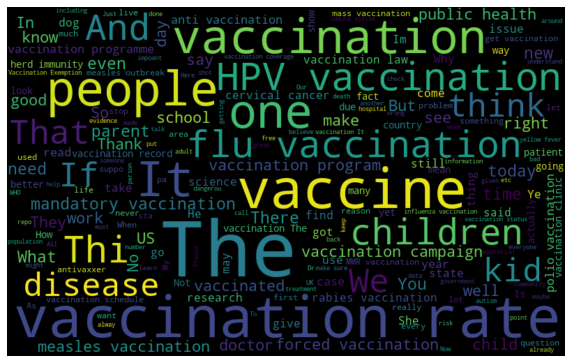

In [13]:
all_words = ' '.join([text for text in df['clean_tweets']])
# all_words
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Sentiment Analysis Using VADER

In [14]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\avadavelli\AppData\Roaming\nltk_data...


True

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

(array([ 1587.,  3253.,  3547.,  4185.,  4201.,  3918.,  5490.,  3264.,
         2506., 21836.,  3015.,  2229.,  3958.,  4712.,  6173.,  3904.,
         4347.,  3729.,  2986.,  1133.]),
 array([-0.9887 , -0.88971, -0.79072, -0.69173, -0.59274, -0.49375,
        -0.39476, -0.29577, -0.19678, -0.09779,  0.0012 ,  0.10019,
         0.19918,  0.29817,  0.39716,  0.49615,  0.59514,  0.69413,
         0.79312,  0.89211,  0.9911 ]),
 <a list of 20 Patch objects>)

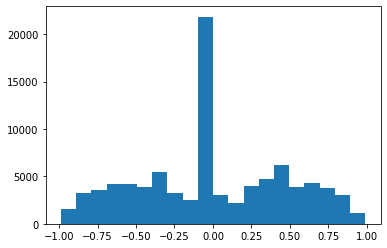

In [18]:
# create analyzer object 
analyzer = SentimentIntensityAnalyzer()
# for tweet in df['clean_tweets']:
#     print(tweet)
# get a list of scores and plot
scores = [analyzer.polarity_scores(tweet)['compound'] for tweet in df['clean_tweets']]
plt.hist(scores, bins=20)

In [21]:
sentiment = df['clean_tweets'].apply(lambda x: analyzer.polarity_scores(x))
sentiment
df = pd.concat([df,sentiment.apply(pd.Series)],1)
df.head(5)

,date,tweet,hashtags,clean_tweets,neg,neu,pos,compound,neg,neu,pos,compound
0,2019-10-03,Thinks: ... tetanus vaccination currently? ...😉,[],Thinks tetanus vaccination currently 😉,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000
1,2019-10-03,Forced Vaccination & It's Ties To Eugenics - D...,[],Forced Vaccination Its Ties To Eugenics David ...,0.300,0.700,0.000,-0.4588,0.300,0.700,0.000,-0.4588
2,2019-10-03,We have had our flu vaccination to protect our...,[],We flu vaccination protect patients staff fami...,0.255,0.490,0.255,0.0000,0.255,0.490,0.255,0.0000
3,2019-10-03,"That's true, they are not, which is why there ...",[],Thats true known contraindications vaccination...,0.000,0.714,0.286,0.4215,0.000,0.714,0.286,0.4215
4,2019-10-03,"Flu vaccination during pregnancy is safe, help...",['#fluvax'],Flu vaccination pregnancy safe helps protect m...,0.160,0.431,0.409,0.7964,0.160,0.431,0.409,0.7964
